In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import tensorflow as ts
import mediapipe as mp
import sklearn

In [2]:
# Load the numpy array from a file
X_data = np.load("X_nanZ.npy")
y_data = np.load("y_100DATA-latest.npy")

In [6]:
print(np.unique(y_data))


['BLACK' 'BLUE' 'BROWN' 'DARK' 'FRIDAY' 'GOOD AFTERNOON' 'GOOD EVENING'
 'GOOD MORNING' 'GRAY' 'GREEN' 'HELLO' 'HOW ARE YOU' 'IM FINE' 'LIGHT'
 'MONDAY' 'NICE TO MEET YOU' 'ORANGE' 'PINK' 'RED' 'SATURDAY'
 'SEE YOU TOMORROW' 'SUNDAY' 'THANK YOU' 'THURSDAY' 'TODAY' 'TOMORROW'
 'TUESDAY' 'VIOLET' 'WEDNESDAY' 'WHITE' 'YELLOW' 'YESTERDAY'
 'YOURE WELCOME']


In [7]:
from tensorflow.keras.utils import to_categorical

# Custom label-to-index mapping to convert labels into their appropriate indexes
label_mapping = {
    'GOOD MORNING': 0,
    'GOOD AFTERNOON': 1,
    'GOOD EVENING': 2,
    'HELLO': 3,
    'HOW ARE YOU': 4,
    'IM FINE': 5,
    'NICE TO MEET YOU': 6,
    'THANK YOU': 7,
    'YOURE WELCOME': 8,
    'SEE YOU TOMORROW': 9,
    'MONDAY': 10,
    'TUESDAY': 11,
    'WEDNESDAY': 12,
    'THURSDAY': 13,
    'FRIDAY': 14,
    'SATURDAY': 15,
    'SUNDAY': 16,
    'TODAY': 17,
    'TOMORROW': 18,
    'YESTERDAY': 19,
    'BLUE': 20,
    'GREEN': 21,
    'RED': 22,
    'BROWN': 23,
    'BLACK': 24,
    'WHITE': 25,
    'YELLOW': 26,
    'ORANGE': 27,
    'GRAY': 28,
    'PINK': 29,
    'VIOLET': 30,
    'LIGHT': 31,
    'DARK': 32
}

# Map y_data to the new indices
y_data_mapped = np.array([label_mapping[label] for label in y_data])

# One-hot encode the mapped y_data
y_data_one_hot = to_categorical(y_data_mapped, num_classes=33).astype(int)


In [14]:
y_data_one_hot.shape

print(y_data_one_hot)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]]


In [5]:
print(y_data)
y_data.shape

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


(3408, 33)

In [15]:
from sklearn.model_selection import train_test_split

# Split 70/30 for train sets and temporary sets
X_train, X_temp, y_train, y_temp = train_test_split(X_data, y_data_one_hot, test_size=0.30, random_state=42)

# Split 50/50 (from the 30% of the initial set) for test and val sets (15% for both, in general)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)

In [21]:
print(X_train.shape)

(2385, 120, 150)


In [22]:
# Save split data
np.save('X_train-INDEX.npy', X_train)
np.save('y_train-INDEX.npy', y_train)

np.save('X_val-INDEX.npy', X_val)
np.save('y_val-INDEX.npy', y_val)

np.save('X_test-INDEX.npy', X_test)
np.save('y_test-INDEX.npy', y_test)


In [1]:
# Load split data
X_train = np.load('X_train-INDEX.npy')
y_train = np.load('y_train-INDEX.npy')

X_val = np.load('X_val-INDEX.npy')
y_val = np.load('y_val-INDEX.npy')

X_test = np.load('X_test-INDEX.npy')
y_test = np.load('y_test-INDEX.npy')


In [8]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(2385, 120, 150)
(512, 120, 150)
(511, 120, 150)
(2385, 33)
(512, 33)
(511, 33)


In [24]:
from tensorflow.keras.callbacks import TensorBoard
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam

model = Sequential()

# First LSTM layer 
model.add(LSTM(128, return_sequences=True, input_shape=(120, 150)))
model.add(BatchNormalization()) 
model.add(Dropout(0.4)) 

# Second LSTM layer
model.add(LSTM(128, return_sequences=False))
model.add(BatchNormalization())
model.add(Dropout(0.4)) 

# Dense layer for feature extraction
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())  
model.add(Dropout(0.4))  

# Output layer
model.add(Dense(33, activation='softmax')) 

# Optimizer
optimizer = Adam(learning_rate=0.0001)
model.compile(
    optimizer=optimizer, 
    loss='categorical_crossentropy', 
    metrics=['categorical_accuracy']
    )


/Users/kcchavez/Downloads/Contender-Models/.venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [3]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 120, 128)       │       142,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 120, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 120, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 33)             │         2,145 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 286,113 (1.09 MB)

 Trainable params: 285,473 (1.09 MB)

 Non-trainable params: 640 (2.50 KB)

In [29]:
from keras.callbacks import ModelCheckpoint

# ModelCheckpoint to save the best model
checkpoint = ModelCheckpoint(
    '251ep-NOZ-INDEX-BEST.keras',         
    monitor='val_loss',       
    verbose=1,               
    save_best_only=True,     
    mode='min'               
)

# Train model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val), 
    epochs=250,
    batch_size=32,
    callbacks=[checkpoint]
)


Epoch 1/250
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - categorical_accuracy: 0.0397 - loss: 4.3352
Epoch 1: val_loss improved from inf to 3.53826, saving model to 251ep-NOZ-INDEX-BEST.keras
75/75 ━━━━━━━━━━━━━━━━━━━━ 10s 92ms/step - categorical_accuracy: 0.0397 - loss: 4.3346 - val_categorical_accuracy: 0.0333 - val_loss: 3.5383
Epoch 2/250
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - categorical_accuracy: 0.0407 - loss: 4.1301
Epoch 2: val_loss did not improve from 3.53826
75/75 ━━━━━━━━━━━━━━━━━━━━ 7s 90ms/step - categorical_accuracy: 0.0408 - loss: 4.1300 - val_categorical_accuracy: 0.0215 - val_loss: 3.5564
Epoch 3/250
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - categorical_accuracy: 0.0482 - loss: 4.0195
Epoch 3: val_loss improved from 3.53826 to 3.44984, saving model to 251ep-NOZ-INDEX-BEST.keras
75/75 ━━━━━━━━━━━━━━━━━━━━ 7s 89ms/step - categorical_accuracy: 0.0483 - loss: 4.0188 - val_categorical_accuracy: 0.0431 - val_loss: 3.4498
Epoch 4/250
74/75 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step 

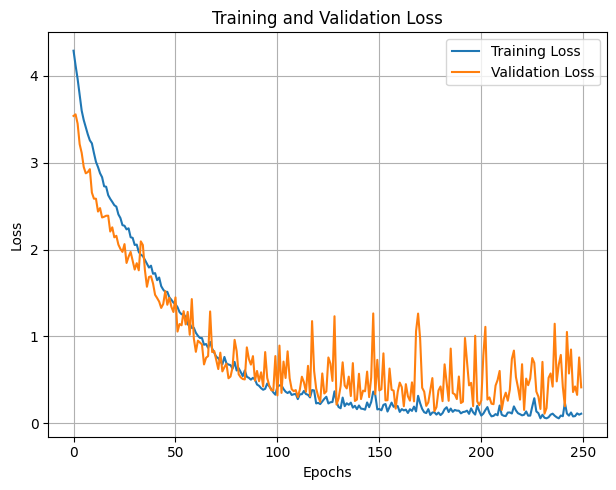

In [30]:
# Plotting training and validation loss
plt.figure(figsize=(12, 5))

# Loss plot
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


In [34]:
# Evaluate the model on training data
train_loss, train_accuracy = model.evaluate(X_train, y_train)

# Evaluate the model on testing data
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print("Training Loss:", train_loss)
print("Training Accuracy:", train_accuracy)
print("Testing Loss:", test_loss)
print("Testing Accuracy:", test_accuracy)

75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - categorical_accuracy: 0.9992 - loss: 0.0057
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - categorical_accuracy: 0.9824 - loss: 0.0685
Training Loss: 0.00525440089404583
Training Accuracy: 0.999161422252655
Testing Loss: 0.08905307948589325
Testing Accuracy: 0.978515625


In [35]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix

# Evaluate the model on training data
train_loss, train_accuracy = model.evaluate(X_train, y_train)

# Evaluate the model on testing data
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print("Training Loss:", train_loss)
print("Training Accuracy:", train_accuracy)
print("Testing Loss:", test_loss)
print("Testing Accuracy:", test_accuracy)

# Generate predictions for the test set
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)
y_true = y_test.argmax(axis=1) 

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Compute precision and recall for each class
precision_per_class = precision_score(y_true, y_pred_classes, average=None) * 100  
recall_per_class = recall_score(y_true, y_pred_classes, average=None) * 100  

# Compute overall precision and recall (micro or macro averaging)
precision_macro = precision_score(y_true, y_pred_classes, average='macro') * 100 
recall_macro = recall_score(y_true, y_pred_classes, average='macro') * 100  

# results
print("Confusion Matrix:")
print(conf_matrix)

print("\nPrecision per class:")
for i, p in enumerate(precision_per_class):
    print(f"Class {i}: {p:.2f}%")

print("\nRecall per class:")
for i, r in enumerate(recall_per_class):
    print(f"Class {i}: {r:.2f}%")

print(f"\nOverall Precision (Macro): {precision_macro:.2f}%")
print(f"Overall Recall (Macro): {recall_macro:.2f}%")


75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - categorical_accuracy: 0.9992 - loss: 0.0057
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - categorical_accuracy: 0.9824 - loss: 0.0685
Training Loss: 0.00525440089404583
Training Accuracy: 0.999161422252655
Testing Loss: 0.08905307948589325
Testing Accuracy: 0.978515625
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step
Confusion Matrix:
[[20  0  0 ...  0  0  0]
 [ 0 19  1 ...  0  0  0]
 [ 0  1 15 ...  0  0  0]
 ...
 [ 0  0  0 ... 12  0  0]
 [ 0  0  0 ...  0 15  0]
 [ 0  0  0 ...  0  0 13]]

Precision per class:
Class 0: 100.00%
Class 1: 95.00%
Class 2: 88.24%
Class 3: 100.00%
Class 4: 100.00%
Class 5: 100.00%
Class 6: 100.00%
Class 7: 93.33%
Class 8: 100.00%
Class 9: 90.00%
Class 10: 100.00%
Class 11: 100.00%
Class 12: 95.45%
Class 13: 95.00%
Class 14: 100.00%
Class 15: 100.00%
Class 16: 100.00%
Class 17: 100.00%
Class 18: 93.33%
Class 19: 100.00%
Class 20: 100.00%
Class 21: 100.00%
Class 22: 100.00%
Class 23: 100.00%
Class 24: 100.00%
Class 25: 100.00%
Class

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


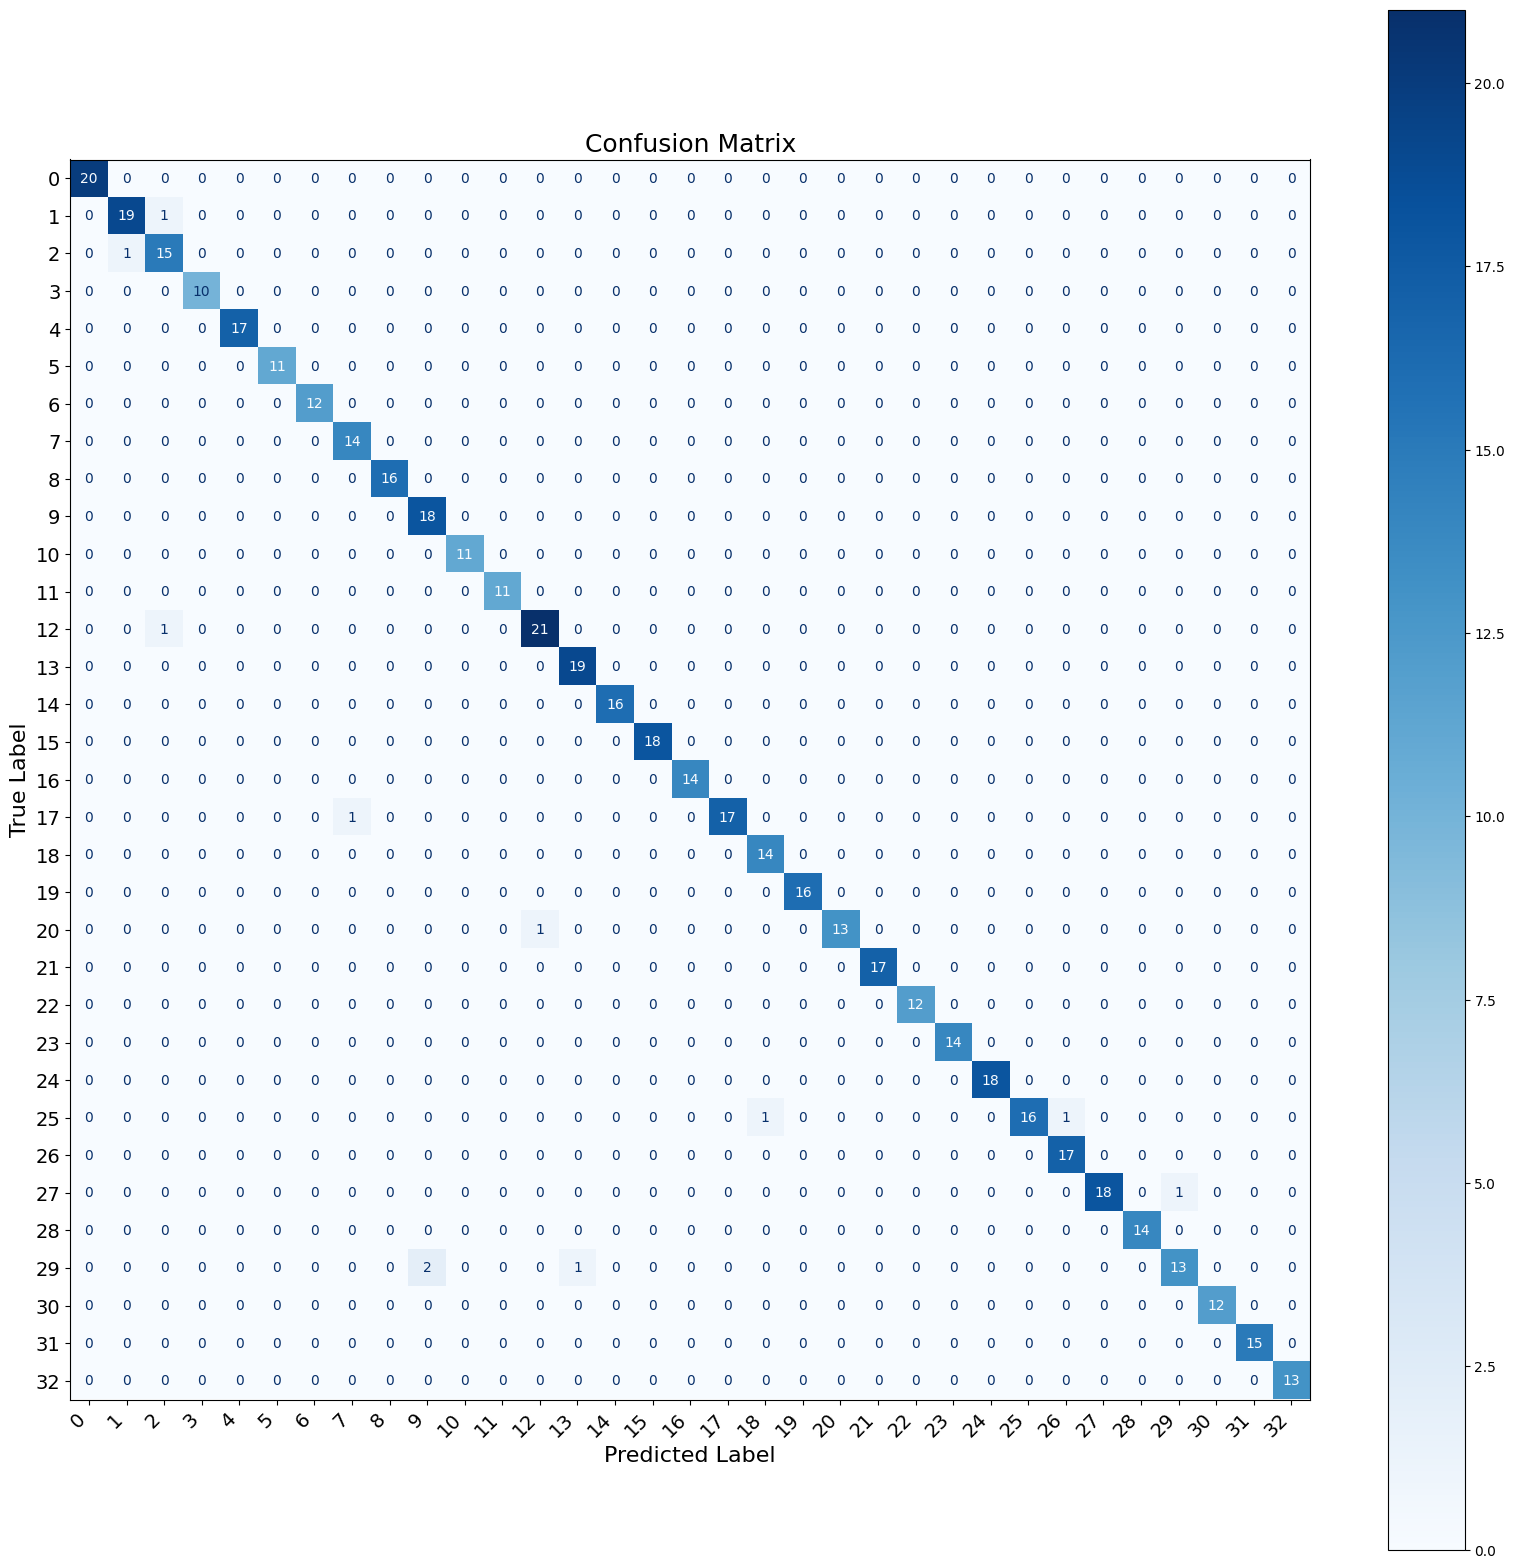

In [36]:
from sklearn.metrics import ConfusionMatrixDisplay

# Get predictions from the model
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)  

# If y_test is in one-hot encoded format, convert it to class indices
if len(y_test.shape) > 1:
    dum_y_test = np.argmax(y_test, axis=1)

# Generate the confusion matrix
cm = confusion_matrix(dum_y_test, y_pred)
fig, ax = plt.subplots(figsize=(20, 20))  
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues, ax=ax, values_format='d') 

plt.xticks(rotation=45, ha='right', fontsize=14) 
plt.yticks(fontsize=14)  
plt.title('Confusion Matrix', fontsize=18)  
plt.xlabel('Predicted Label', fontsize=16) 
plt.ylabel('True Label', fontsize=16) 
plt.show()


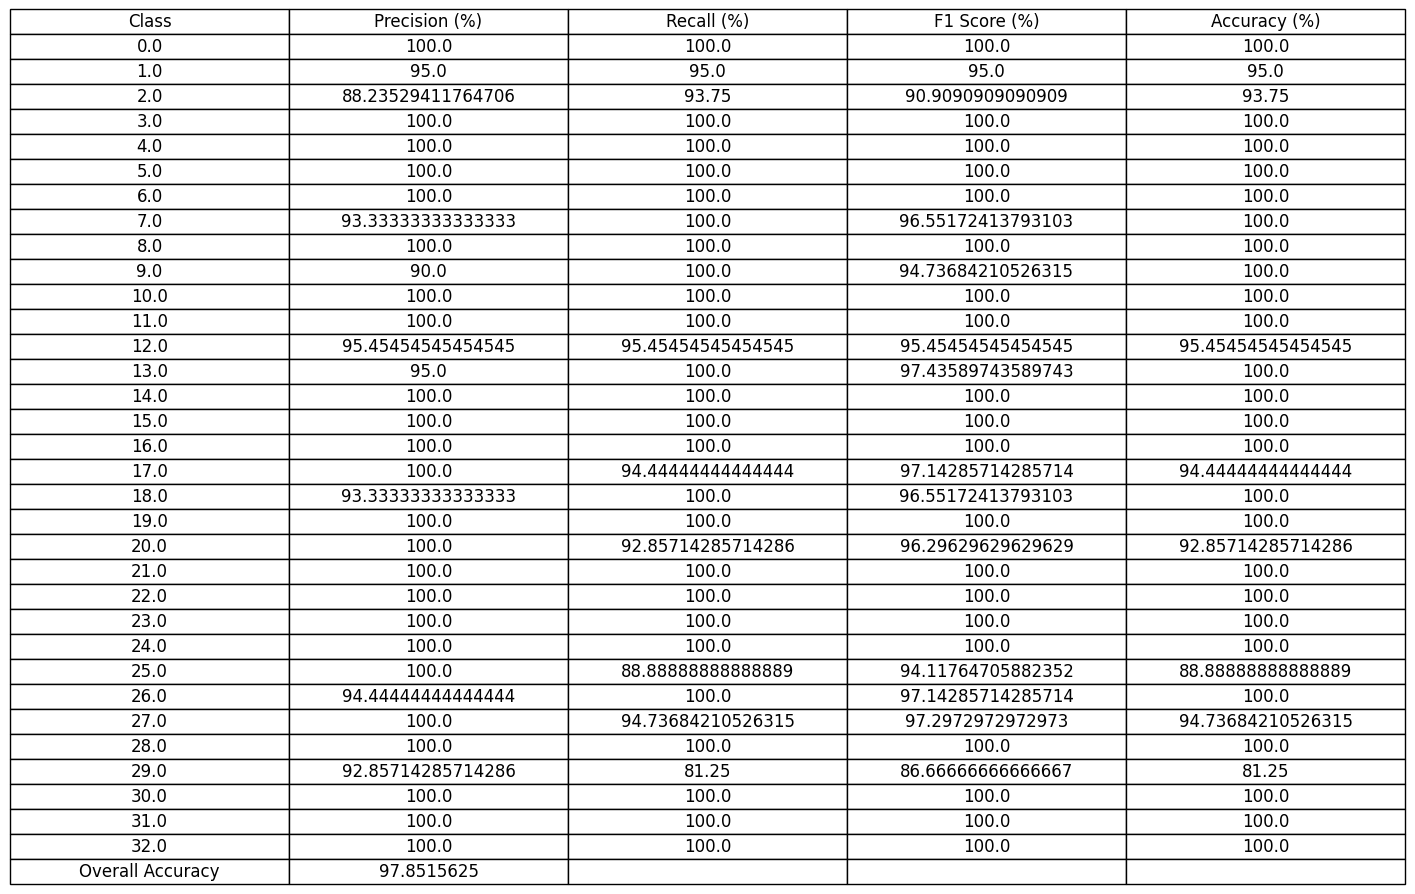

In [37]:
from sklearn.metrics import f1_score

# Compute precision, recall, and F1 score for each class
precision_per_class = precision_score(dum_y_test, y_pred, average=None) * 100  
recall_per_class = recall_score(dum_y_test, y_pred, average=None) * 100  
f1_per_class = f1_score(dum_y_test, y_pred, average=None) * 100  

# Calculate accuracy for each class
class_accuracies = []
for i in range(len(precision_per_class)):
    class_accuracies.append(np.mean(dum_y_test[dum_y_test == i] == y_pred[dum_y_test == i]) * 100 if np.sum(dum_y_test == i) > 0 else 0)

# Calculate overall accuracy
overall_accuracy = np.mean(dum_y_test == y_pred) * 100 

classes = np.arange(len(precision_per_class))
metrics = np.vstack((precision_per_class, recall_per_class, f1_per_class, class_accuracies)).T
accuracy_row = np.array(["Overall Accuracy", overall_accuracy, "", "", ""]) 
metrics_with_accuracy = np.vstack((np.column_stack((classes, metrics)), accuracy_row))

plt.figure(figsize=(12, 8))
table = plt.table(cellText=metrics_with_accuracy,
                  colLabels=["Class", "Precision (%)", "Recall (%)", "F1 Score (%)", "Accuracy (%)"],
                  cellLoc='center',
                  loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.5, 1.5) 
plt.axis('off')
plt.show()


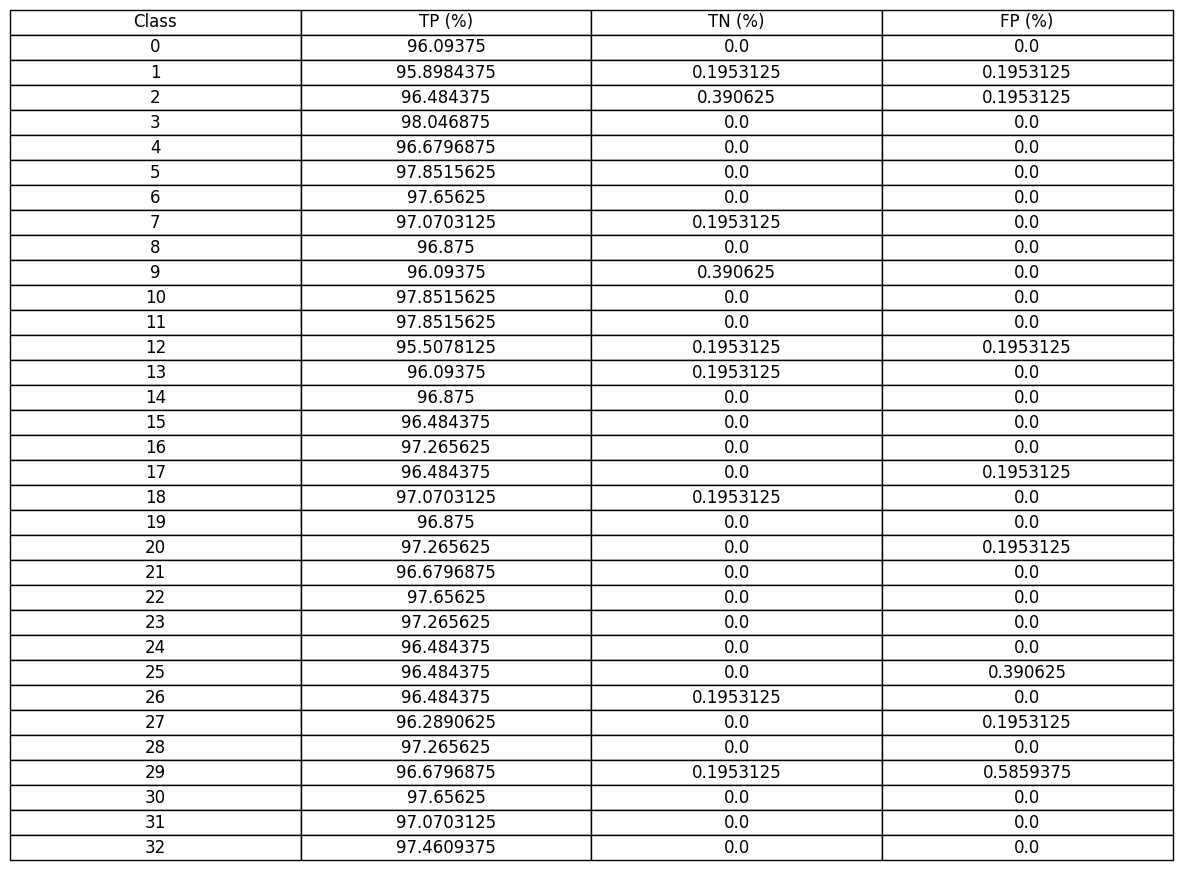

In [41]:
# Generate the confusion matrix
cm = confusion_matrix(dum_y_test, y_pred)

TP = []
TN = []
FP = []
FN = []
total_samples = len(dum_y_test)

# Calculate TP, TN, FP, FN for each class
for i in range(cm.shape[0]):
    TP.append(cm[i, i])  
    FP.append(np.sum(cm[:, i]) - TP[-1]) 
    FN.append(np.sum(cm[i, :]) - TP[-1])  
    TN.append(total_samples - (TP[-1] + FP[-1] + FN[-1])) 

# Calculate percentages
TP_percentage = [(tp / total_samples) * 100 for tp in TP]
TN_percentage = [(tn / total_samples) * 100 for tn in TN]
FP_percentage = [(fp / total_samples) * 100 for fp in FP]
FN_percentage = [(fn / total_samples) * 100 for fn in FN]

unique_classes = np.unique(dum_y_test)

# Prepare the data for the table
metrics = np.vstack((TP_percentage, TN_percentage, FP_percentage, FN_percentage)).T


plt.figure(figsize=(10, 6))
table = plt.table(cellText=metrics,
                  colLabels=["Class", "TP (%)", "TN (%)", "FP (%)", "FN (%)"],
                  cellLoc='center',
                  loc='center')

for i, class_label in enumerate(unique_classes):
    table[(i + 1, 0)].get_text().set_text(str(class_label))

table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.5, 1.5)  
plt.axis('off')
plt.show()


In [33]:
from tensorflow.keras.models import load_model
model = load_model('251ep-NOZ-INDEX-BEST.keras')

In [17]:
model.save('251ep-NOZ-INDEX-new.keras')